The dataset provides the details of trending YouTube videos in Germany. We analyse the data to find interesting insights and train a model to predict the reachability of the videos in terms of viewership.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import os
cur=os.getcwd()
df = pd.read_csv(cur+"/DEvideos.csv")

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

In [4]:
print('Missing values', df.isna().sum())
#Missing values in the attribute description

Missing values video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64


In [5]:
print('Check multiple entries\n',df.video_id.value_counts())
#Findings: Several videos have multiple entries. Because the same video was trending for multiple days. Therefore the number of days of trending for each video matters.

Check multiple entries
 video_id
pk0iqFne5eU    7
myXi1KMyClc    6
AdQsDopZfS4    5
csA3Ie-VIbs    5
F_Q6sjRRZMs    5
              ..
VSTME7y6Idw    1
JFBImWWNwgg    1
l6clbgGx1fs    1
ae_z-oGvN1I    1
qLM1NA272v0    1
Name: count, Length: 29627, dtype: int64


In [20]:
#Finding the behaviour of data with respect to time
#The values of views, likes, dislikes, and comment count are cumulative over time. The latest value corresponds to the cumulative sum.
df[df.video_id=="pk0iqFne5eU"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_count
22375,pk0iqFne5eU,18.08.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",46622,1296,184,117,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,13
22557,pk0iqFne5eU,18.09.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",288392,4839,2109,471,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,13
22758,pk0iqFne5eU,18.10.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",817531,9717,5054,896,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,13
22964,pk0iqFne5eU,18.11.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1304894,12763,6751,1110,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,13
23198,pk0iqFne5eU,18.12.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1649350,14414,7688,1204,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,13
23431,pk0iqFne5eU,18.13.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1806532,15180,8127,1315,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,13
23628,pk0iqFne5eU,18.14.03,Was diese Ex-Serienstars HEUTE machen,Wissenswert,22,2018-03-07T16:30:01.000Z,"top 10|""top 5""|""die 10""|""wissenswert""|""lifesty...",1985594,15947,8652,1384,https://i.ytimg.com/vi/pk0iqFne5eU/default.jpg,False,False,False,Willkommen bei wissenswert\nUnser Instagram: h...,13


In [7]:
#remove all error videos
df = df[~df['video_error_or_removed']]

#Change the data type of category
df['category_id'] = df['category_id'].astype('object')

#finding tag count
df["tag_count"]=df.tags.apply(lambda x : len(str(x).split("|")))


In [8]:
# Aggregating the views from first day to final day
df = df.sort_values(['video_id', 'trending_date'])
video_summary = df.groupby('video_id').agg(
    trending_days=('trending_date', 'count'),  # number of days trending
    final_views=('views', 'last')             # cumulative count of views/ latest number of views
).reset_index()
video_summary = video_summary.merge(
    df.groupby('video_id').first()[['category_id', 'publish_time', 'tag_count','likes','comment_count','dislikes','comments_disabled', 'ratings_disabled']],
    on='video_id'
)
video_summary=video_summary.rename(columns={"likes":"Initial_day_likes", "comment_count": "Initial_day_comments","dislikes":"Initial_day_dislikes"})
video_summary.head()

,video_id,trending_days,final_views,category_id,publish_time,tag_count,Initial_day_likes,Initial_day_comments,Initial_day_dislikes,comments_disabled,ratings_disabled
0,--7vNbh4UNA,1,1082647,25,2018-04-13T19:00:00.000Z,17,52113,10602,1284,False,False
1,--I0aj8MUdU,2,139025,24,2018-02-04T13:19:38.000Z,6,382,15,59,False,False
2,--MtKsH5oBY,2,225445,17,2018-05-31T12:40:46.000Z,11,3516,767,372,False,False
3,--moh3hSPpY,1,17050,24,2018-01-02T13:30:00.000Z,6,100,74,32,False,False
4,--rE6D0_jAw,1,5406,24,2018-04-29T14:35:57.000Z,8,964,191,4,False,False


Text(0.5, 0, 'Tag count')

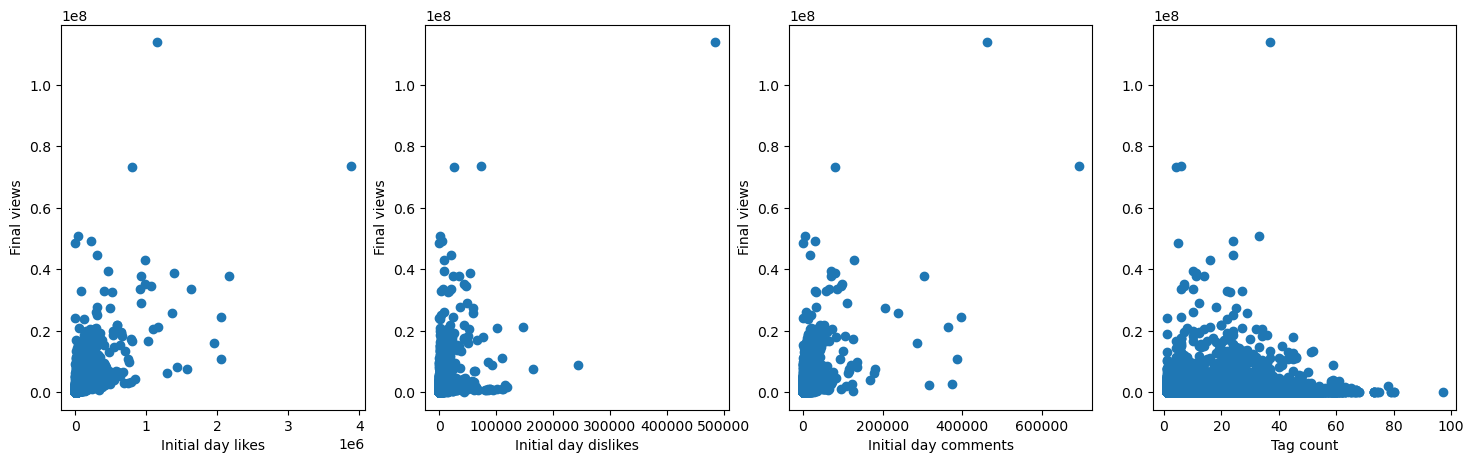

In [9]:
# Finding how the initial day responses, such as likes, dislikes, comments and number of tags, influence the total number of views
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
[axes[i].set_ylabel("Final views") for i in range(0,3)]
axes[0].scatter(video_summary.Initial_day_likes,video_summary.final_views)
axes[0].set_xlabel("Initial day likes")

axes[1].scatter(video_summary.Initial_day_dislikes,video_summary.final_views)
axes[1].set_xlabel("Initial day dislikes")

axes[2].scatter(video_summary.Initial_day_comments,video_summary.final_views)
axes[2].set_xlabel("Initial day comments")


axes[3].scatter(video_summary.tag_count,video_summary.final_views)
axes[3].set_xlabel("Tag count")
#Findings: We observed a weak positive influence of all exploratory variables on the target. But it is better to check for outliers and then transform the values to a logarithmic scale.

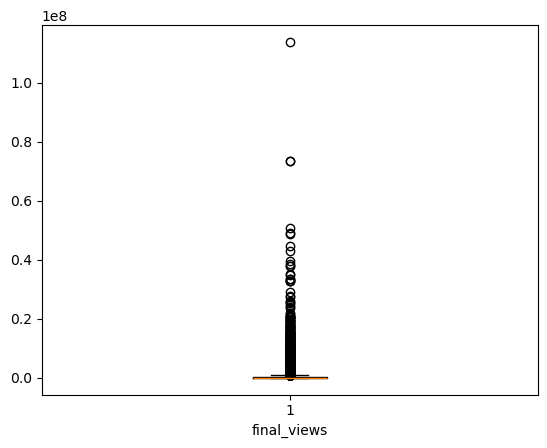

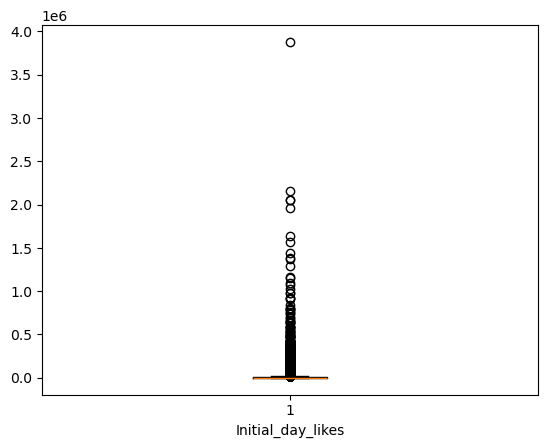

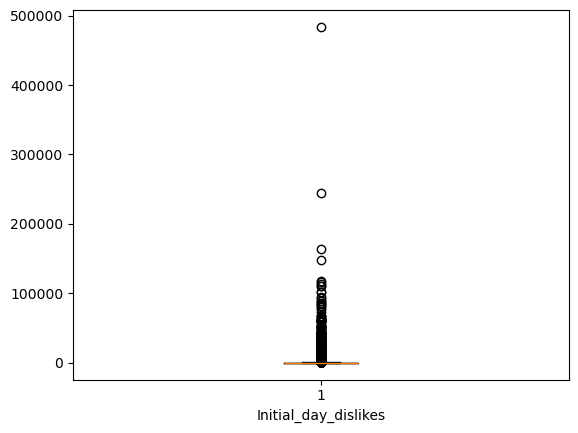

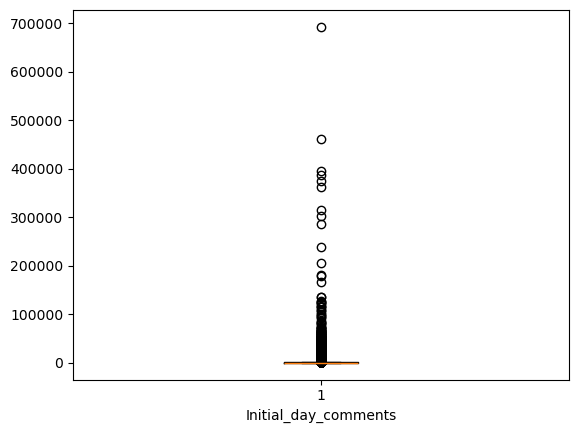

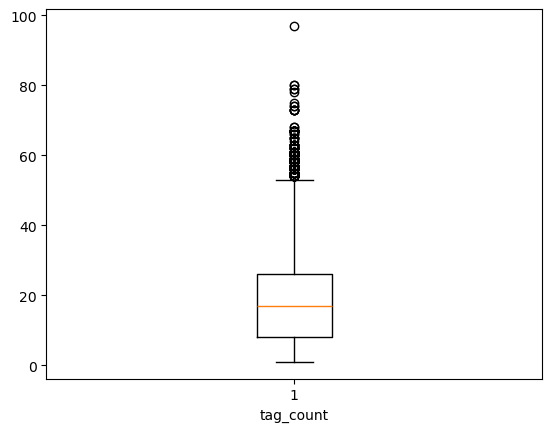

In [10]:
attr_col = ["final_views","Initial_day_likes","Initial_day_dislikes","Initial_day_comments","tag_count"]
for x in attr_col:
    if(video_summary[x].dtype=='int'):
        plt.figure()
        plt.xlabel(x)
        plt.boxplot(video_summary[x])        
#The values are cluttered, and the outliers are not discoverable. We again need to transform these columns to a logarithmic scale to find outliers. The tag count does not require this.

In [11]:
data = video_summary.copy()
for x in attr_col:
    cur_att=x
    if(x!="tag_count"):
        cur_att="log_"+x
        data[cur_att]=np.log1p(data[x])
    Q1 = data[cur_att].quantile(0.25)
    Q3 = data[cur_att].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[cur_att] >= lower_bound) & 
              (data[cur_att] <= upper_bound)]
data.head()

,video_id,trending_days,final_views,category_id,publish_time,tag_count,Initial_day_likes,Initial_day_comments,Initial_day_dislikes,comments_disabled,ratings_disabled,log_final_views,log_Initial_day_likes,log_Initial_day_dislikes,log_Initial_day_comments
0,--7vNbh4UNA,1,1082647,25,2018-04-13T19:00:00.000Z,17,52113,10602,1284,False,False,13.894920,10.861189,7.158514,9.268892
1,--I0aj8MUdU,2,139025,24,2018-02-04T13:19:38.000Z,6,382,15,59,False,False,11.842416,5.948035,4.094345,2.772589
2,--MtKsH5oBY,2,225445,17,2018-05-31T12:40:46.000Z,11,3516,767,372,False,False,12.325836,8.165364,5.921578,6.643790
3,--moh3hSPpY,1,17050,24,2018-01-02T13:30:00.000Z,6,100,74,32,False,False,9.743964,4.615121,3.496508,4.317488
4,--rE6D0_jAw,1,5406,24,2018-04-29T14:35:57.000Z,8,964,191,4,False,False,8.595450,6.872128,1.609438,5.257495


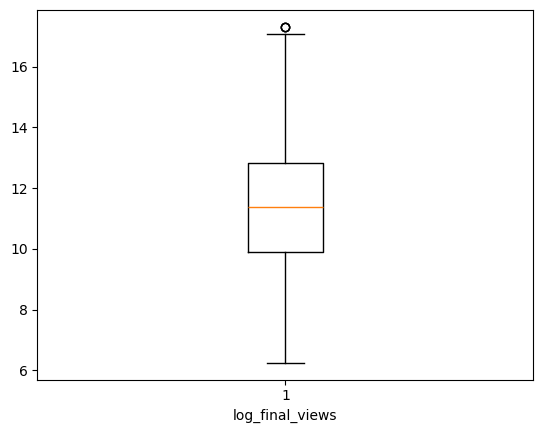

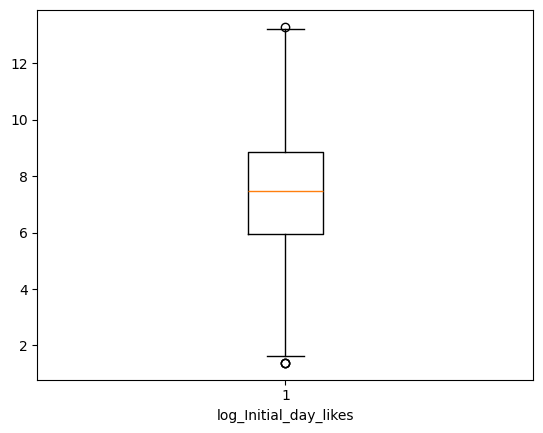

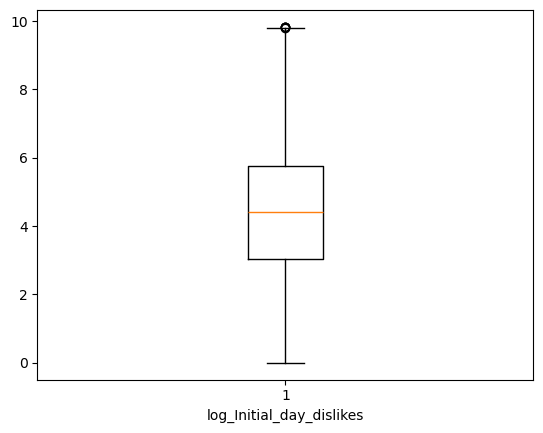

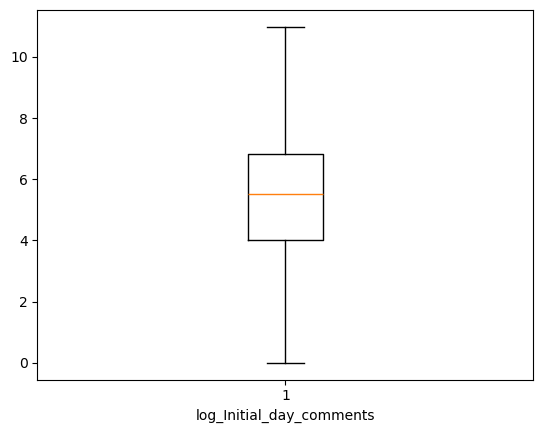

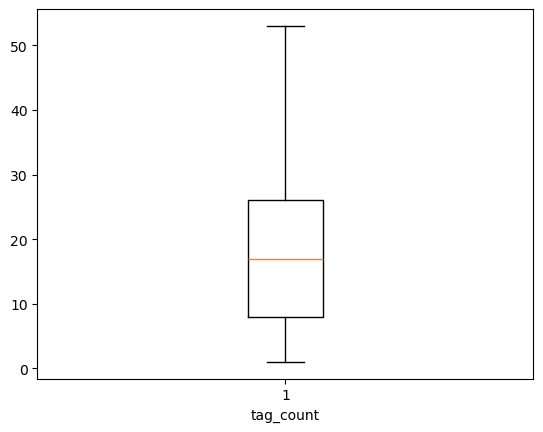

In [12]:
#Outliers evaluation
attr_col = ["log_final_views","log_Initial_day_likes","log_Initial_day_dislikes","log_Initial_day_comments",'tag_count']
for x in attr_col:
    plt.figure()
    plt.xlabel(x)
    plt.boxplot(data[x])
#No more Outliers    

Text(0.5, 0, 'Tag count')

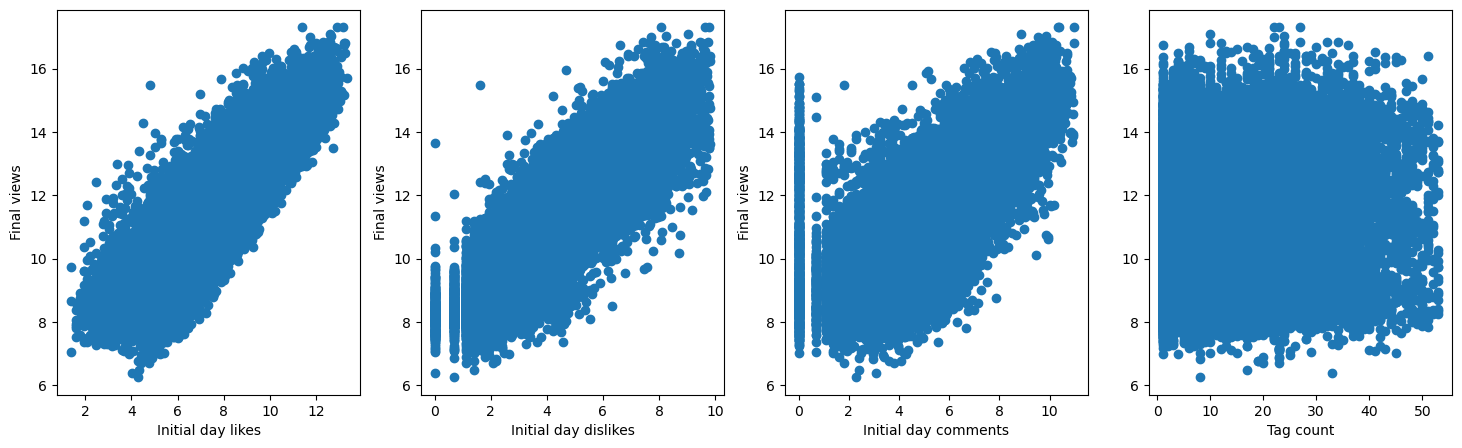

In [13]:
# Finding how the log of the initial day responses, such as likes, dislikes, comments and number of tags, influence the total number of views
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
[axes[i].set_ylabel("Final views") for i in range(0,3)]
axes[0].scatter(data.log_Initial_day_likes,data.log_final_views)
axes[0].set_xlabel("Initial day likes")

axes[1].scatter(data.log_Initial_day_dislikes,data.log_final_views)
axes[1].set_xlabel("Initial day dislikes")

axes[2].scatter(data.log_Initial_day_comments,data.log_final_views)
axes[2].set_xlabel("Initial day comments")


axes[3].scatter(data.tag_count,data.log_final_views)
axes[3].set_xlabel("Tag count")
#Findings: We could see a strong positive influence of initial day likes, dislikes and comments on the target variable. The Tag count shows weak influence.
# The correlation is linearly dispersed. A linear regression with a regularisation parameter could model this data. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

attr_col = ["log_Initial_day_likes","log_Initial_day_dislikes","log_Initial_day_comments",'trending_days','category_id','ratings_disabled','comments_disabled']

X = data[attr_col]
X=pd.get_dummies(X,columns=["category_id"])
std=StandardScaler()
X=std.fit_transform(X)
y = data.log_final_views

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train,)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 0.7948929322210174
R² Score: 0.8179423071495812


In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {
    "alpha": [0.01, 0.1, 0.5, 1, 1.5, 10, 100]
}

grid = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)
#Findings: The ridge regression performs well with this data. 

RMSE: 0.794895213673407
R² Score: 0.8179412620866862
Best params: {'alpha': 1.5}
Best score: 0.8249572263573477


In [17]:
# A slightly more advanced algorithm of the random forest regressor.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.7386269669813103
R² Score: 0.8428037856992182


In [18]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="r2",
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)


Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Best CV score: 0.8565154764019663
